<a href="https://colab.research.google.com/github/vickiwang2020/PythonDataScience/blob/main/Vicki_Reference_Notebook_Milestone_1_2_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Milestone 1**

##<b>Problem Definition</b>
**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What is it that we are trying to solve using data science?

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## <b>Important Notes</b>

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdowns cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

### **Import the necessary libraries**

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV
# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation


import warnings
warnings.filterwarnings('ignore')

### **Read the dataset**

In [212]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [213]:
hm=pd.read_csv("/content/drive/MyDrive/hmeq.csv")

In [214]:
# Copying data to another variable to avoid any changes to original data
data=hm.copy()

### **Print the first and last 5 rows of the dataset**

In [215]:
# Display first five rows
# Remove ___________ and complete the code

data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [216]:
# Display last 5 rows
# Remove ___________ and complete the code
data.tail()


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


### **Understand the shape of the dataset**

In [217]:
# Check the shape of the data
# Remove ___________ and complete the code

data.shape 

(5960, 13)

**Insights ________**
- There are 5,960 observations and 13 columns in the data.



### **Check the data types of the columns**

In [218]:
# Check info of the data
# Remove ___________ and complete the code
data.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

**Insights ______________**
- There are 13 columns which are 'BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG','DELINQ', 'CLAGE', 'NINQ', 'CLNO', and 'DEBTINC, the data type is object.

### **Check for missing values**

In [219]:
# Analyse missing values - Hint: use isnull() function
# Remove ___________ and complete the code
data.isnull()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,True,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,False,False,False,False,False,False,False,False,False,False,False,False,False
5956,False,False,False,False,False,False,False,False,False,False,False,False,False
5957,False,False,False,False,False,False,False,False,False,False,False,False,False
5958,False,False,False,False,False,False,False,False,False,False,False,False,False


In [220]:
# Check the percentage of missing values in the each column.
# Hint: divide the result from the previous code by the number of rows in the dataset
# Remove ___________ and complete the code

percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
BAD,BAD,0.000000
LOAN,LOAN,0.000000
MORTDUE,MORTDUE,8.691275
VALUE,VALUE,1.879195
REASON,REASON,4.228188
JOB,JOB,4.681208
YOJ,YOJ,8.640940
DEROG,DEROG,11.879195
DELINQ,DELINQ,9.731544
CLAGE,CLAGE,5.167785


**Insights ________**
- Except for BAD and LOAN the rest columns have missing values.
- Debt-to-income ratio (aka DEBTINC)'s missing rate is the highest, over 21%
- Number of major derogatory reports (akaDEROG) is the second highest-11.9%
- The least missing value is Current Value of Property (aka Value)-1.9%.

### **Think about it:**
- We found the total number of missing values and the percentage of missing values, which is better to consider?
- What can be the limit for % missing values in a column in order to avoid it and what are the challenges associated with filling them and avoiding them? 

**We can convert the object type columns to categories**

`converting "objects" to "category" reduces the data space required to store the dataframe`

### **Convert the data types**

In [221]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical

cols.append('BAD')

In [222]:
cols

['REASON', 'JOB', 'BAD']

In [223]:
# Changing the data type of object type column to category. hint use astype() function
# remove ___________ and complete the code

for i in cols:
    data[i] = data[i].astype("category")

data

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [224]:
# Checking the info again and the datatype of different variable
# remove ___________ and complete the code
data.info
data.dtypes

BAD        category
LOAN          int64
MORTDUE     float64
VALUE       float64
REASON     category
JOB        category
YOJ         float64
DEROG       float64
DELINQ      float64
CLAGE       float64
NINQ        float64
CLNO        float64
DEBTINC     float64
dtype: object

### **Analyze Summary Statistics of the dataset**

In [225]:
# Analyze the summary statistics for numerical variables
# Remove ___________ and complete the code

data.describe(include=['int64','float64']).T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000
DEBTINC,4693.0,33.779915,8.601746,0.524499,29.140031,34.818262,39.003141,203.312149


**Insights ______________**
- The average of amount of loan approved is 18,608 with a strong deviation indicating the amount varies from one to another.
- On average, amount due on the existing mortgage is 73,761 with a wide range. 
- On average, the current value of property is 101,776 with the largest deviation among all. The property value of the clients database shows huge dispartity. 
- The average years of the present job is close to 9 years, with 50% pencentile of 7 years. Hence most of the clients are stable and above medium level position. The salary would be better than the junior level.
- On average the number of major derogatory reports is 0.25 with a single maximum value of 10, which shows a few percentage of the risk for the bank. Yet still need to pay attention on the 10.
- The mean of number of deliquent credit lines is close to 0.4 with a maximum value of 15. Low risk for overdue payment.
- The average age of the oldest credit line in months is close to 180.
- The avgerage of recent credit inquiries are 1.1 with maximum of 17 with 50% pencentile of 1.
- The mean of number of exisiting credit lines are 21.
- The average of debt-to-income ratio is 33 with strong deviation, impling the wide range of borrower's ability to manage the monthly payment to repay the money they plan to borrow.

In [226]:
# Check summary for categorical data - Hint: inside describe function you can use the argument include=['category']
# Remove ___________ and complete the code

data.describe(include=['category']).T

,count,unique,top,freq
BAD,5960,2,0,4771
REASON,5708,2,DebtCon,3928
JOB,5681,6,Other,2388


**Insights _____________**
- **Over 80% (4771/5960) have repaid their loan.**
- Over 68.6% (3928/5708) have taken out a new loan to pay off other liabilities and consumer debts.
- Around 42% clients filled in their job category as "other".

**Let's look at the unique values in all the categorical variables**

In [227]:
# Checking the count of unique values in each categorical column 
# Remove ___________ and complete the code

cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat.value_counts())
    print('*'*40)

Unique values in BAD are :
BAD  REASON   JOB    
0    DebtCon  Other      1271
              ProfExe     718
              Office      528
     HomeImp  Other       511
     DebtCon  Mgr         456
1    DebtCon  Other       333
0    HomeImp  ProfExe     332
              Office      268
1    HomeImp  Other       205
     DebtCon  ProfExe     129
0    HomeImp  Mgr         118
1    DebtCon  Mgr         116
0    HomeImp  Self         94
1    DebtCon  Office       92
     HomeImp  ProfExe      73
0    DebtCon  Sales        63
1    HomeImp  Mgr          56
0    DebtCon  Self         41
1    DebtCon  Sales        34
     HomeImp  Office       33
     DebtCon  Self         32
     HomeImp  Self         21
0    HomeImp  Sales         8
1    HomeImp  Sales         4
dtype: int64
****************************************
Unique values in REASON are :
BAD  REASON   JOB    
0    DebtCon  Other      1271
              ProfExe     718
              Office      528
     HomeImp  Other       511
     

**Insights _____________**
- For the clients who repaid their loan and took out new load to pay their debt, most of them claiming to be "other" category as job position, the second largest role is "ProfExe", the third popular is "office". Clients who repaid their debt and took out new loan for home improvement.


### **Think about it**
- The results above gave the absolute count of unique values in each categorical column. Are absolute values a good measure? 
- If not, what else can be used? Try implementing that. 

## **Exploratory Data Analysis (EDA) and Visualization**

## **Univariate Analysis**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables

### **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyze the numerical columns.

In [228]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Using the above function, let's first analyze the Histogram and Boxplot for LOAN

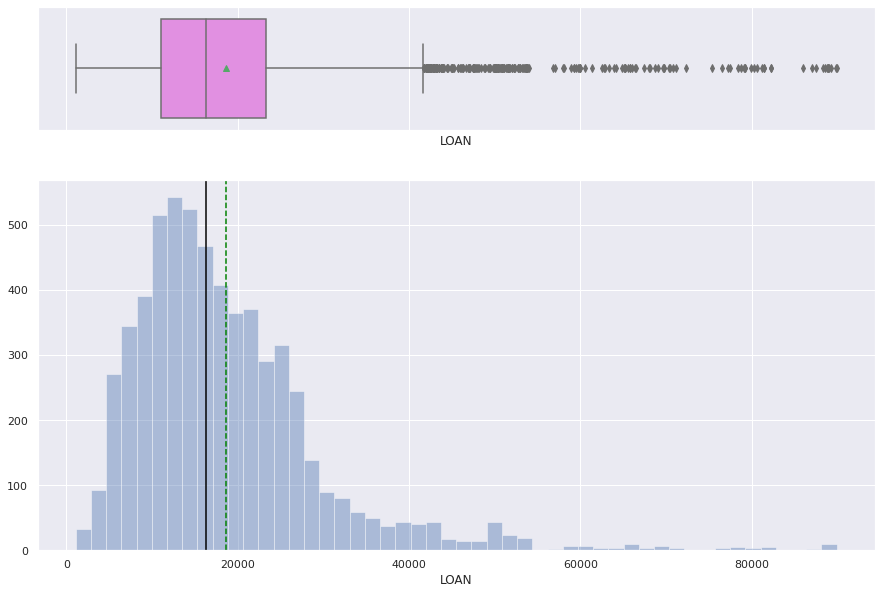

In [229]:
# Build the histogram boxplot for Loan
histogram_boxplot(data['LOAN'])

**Insights __________**
- Clearly right skewed,with mutiple outliers.
- The mean is close to 20,000 and the median(18,500) is less than the mean.
- The majority of the approved loan amount is less than 20,000.

#### **Note:** As done above, analyze Histogram and Boxplot for other variables

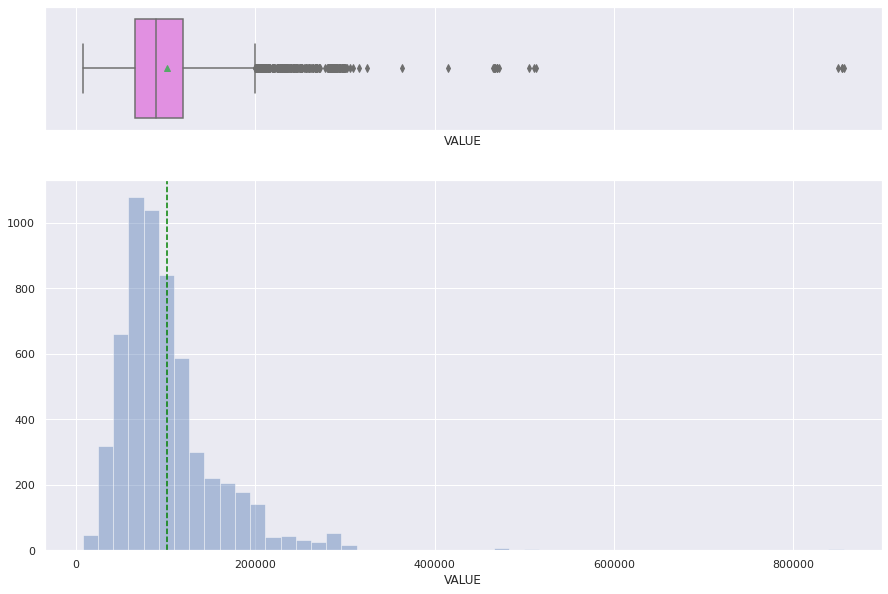

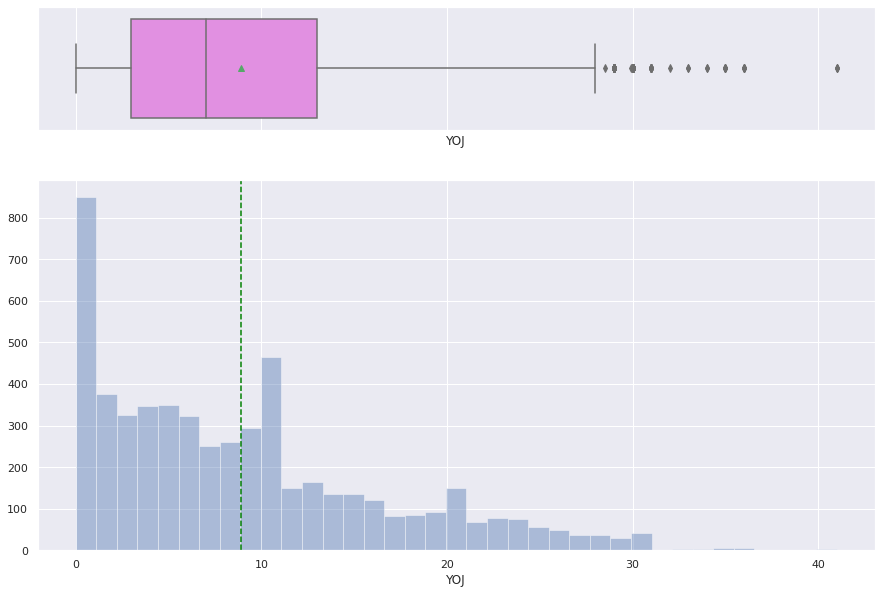

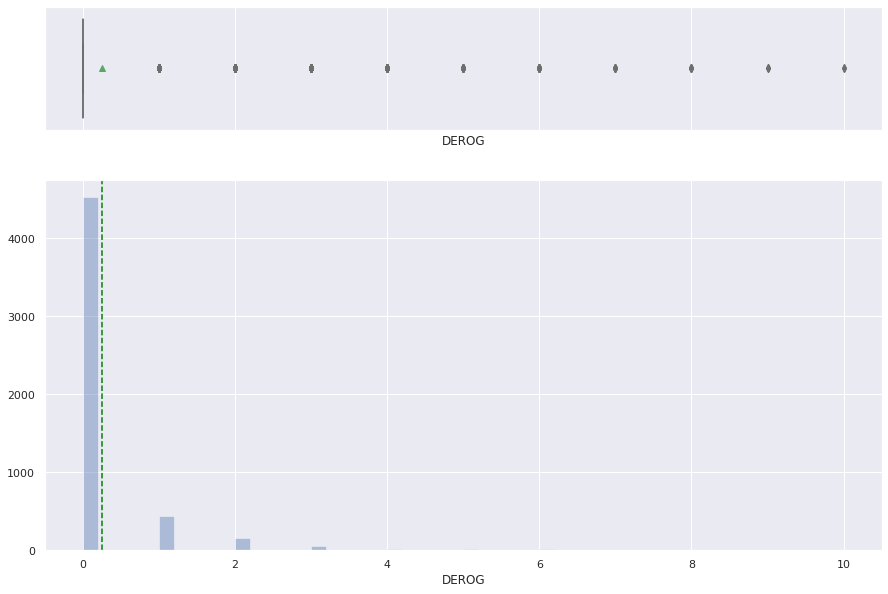

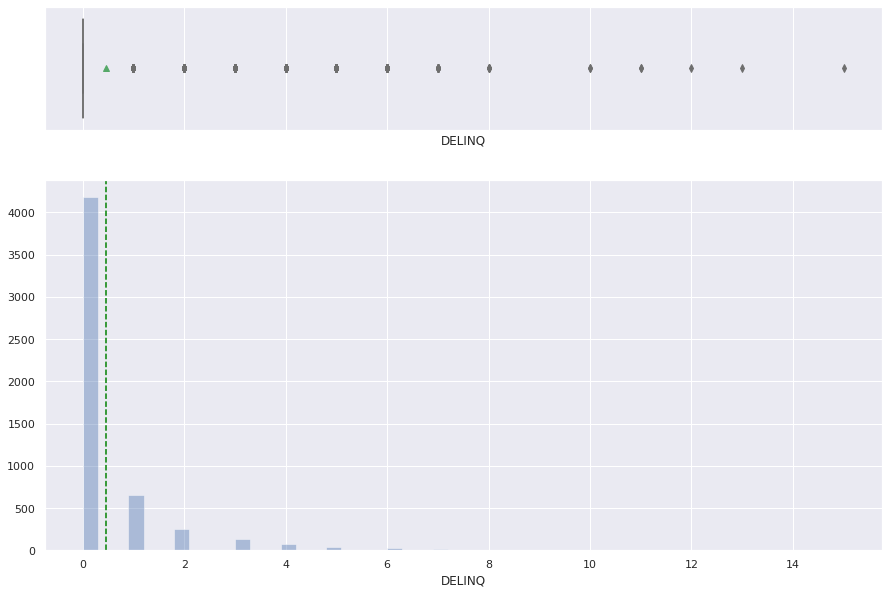

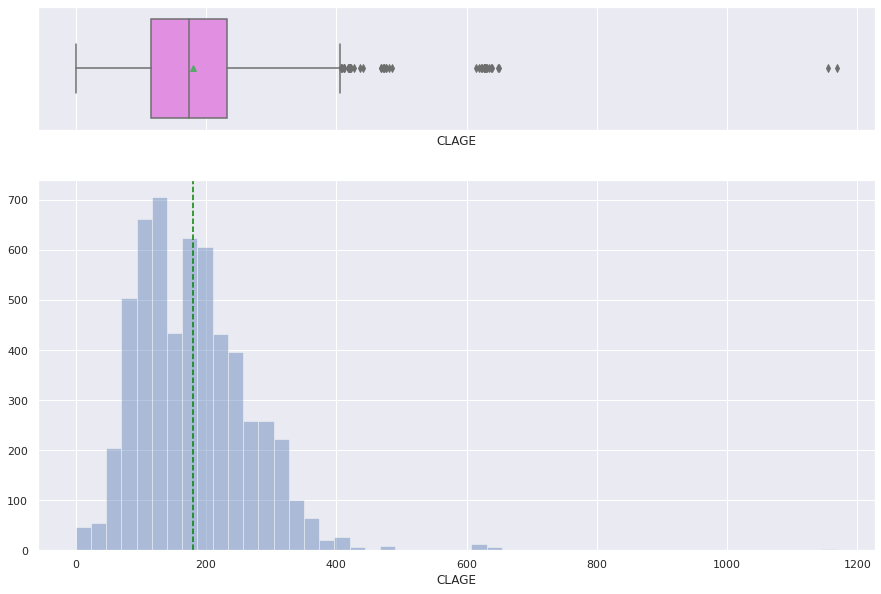

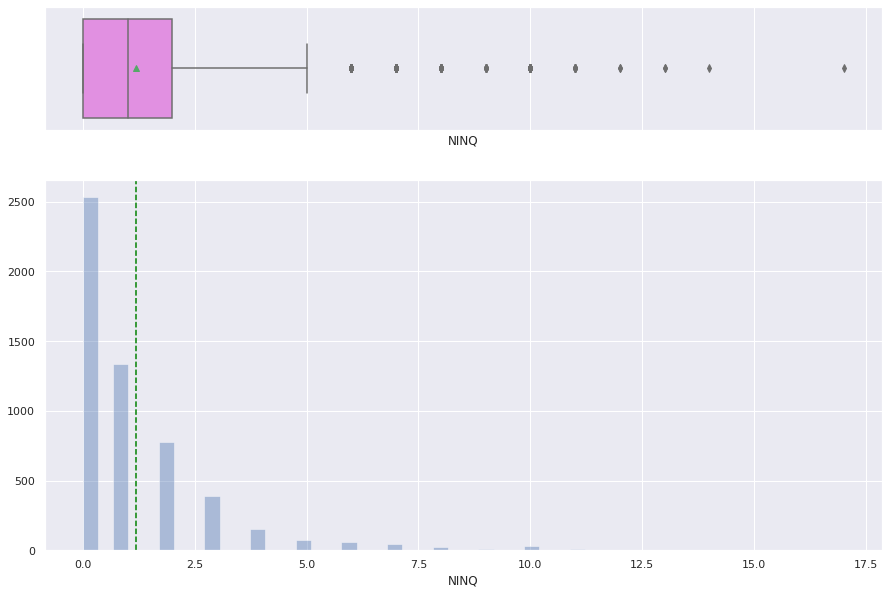

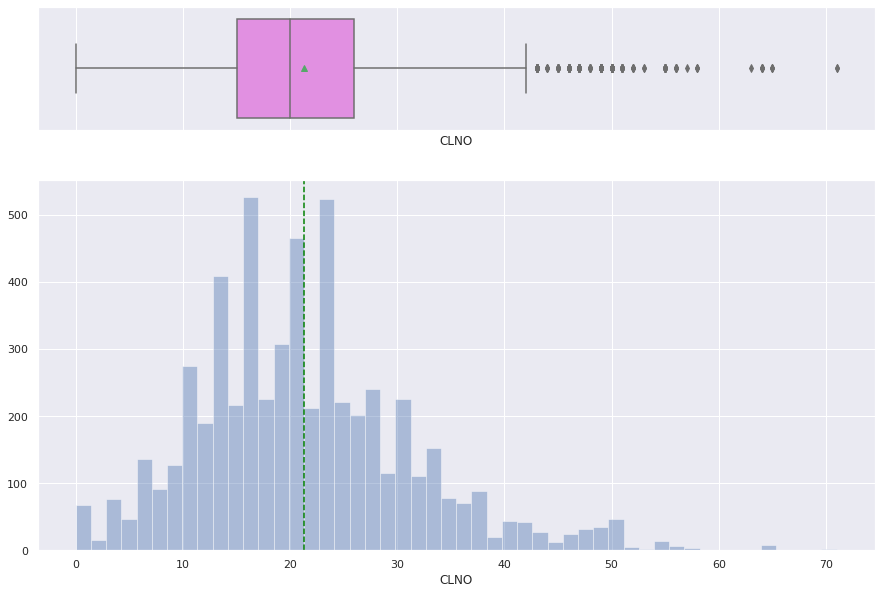

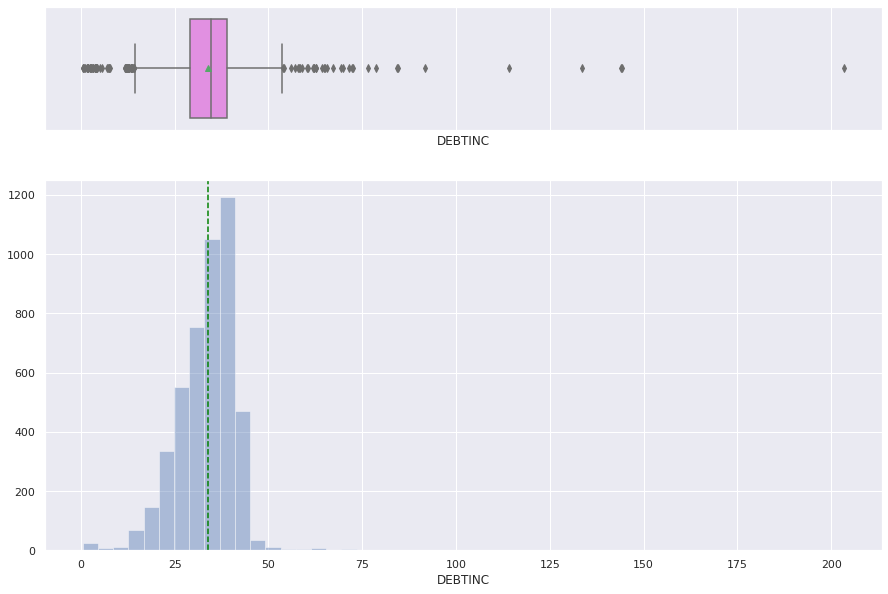

In [230]:
histogram_boxplot(data['VALUE'])
histogram_boxplot(data['YOJ'])
histogram_boxplot(data['DEROG'])
histogram_boxplot(data['DELINQ'])
histogram_boxplot(data['CLAGE'])
histogram_boxplot(data['NINQ'])
histogram_boxplot(data['CLNO'])
histogram_boxplot(data['DEBTINC'])


**Insights ____________**
- The mean of VALUE(current value of property) is 105,000, right-skewed with outliers, only a few have the property value more than the 10500, which would affect the approval of loan and limit the loan amount. 
- **The average of years at present job is 9 years**, right skewed with outliers. Majority is less than 9 years.
- Avgerage Derog (number of derogatory reports) is less than 1.
- Average of DLINQ (number of borrowers who failed to pay overdue minimum amount) is less than 1.
- Average age of the oldest credit line in months is close to medien, which is close to 200.
- The average number of recent credit inquiry is close to 1.
- The average number of existing credit lines is slightly above 20.
- The mean of debt-to-income ratio is close to 40, which shows debts is 40 times over than the income, **poor ability to manage the payment**.

### **2. Univariate Analysis - Categorical Data**

In [231]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() # show the plot

#### Analyze Barplot for DELINQ

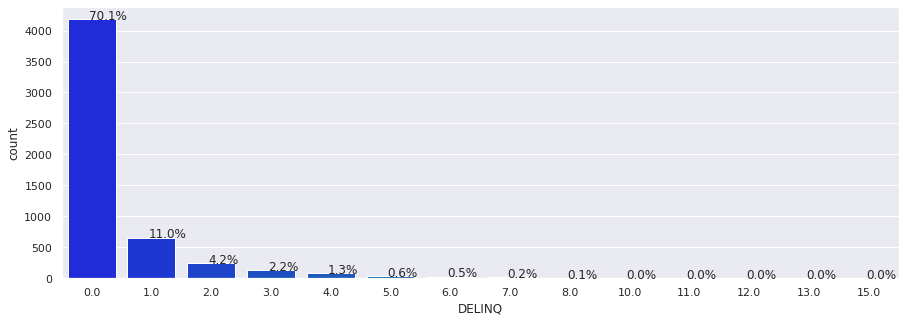

In [232]:
#Build barplot for DELINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(data["DELINQ"],palette='winter')
perc_on_bar(ax,data["DELINQ"])

**Insights ________**
- Majority of DELINQ falls to the 0, which shows that most of the clients don't have the overdue minimum payment issue.
- **11% of 1 delinquent credit line are risky**, hence need to act accordingly, report and check the exact reason behind.
- **4.2% are at minor risk**, 
- **2.2% of 3 delingquent credit line, 1.3% are distributed at 4, shall be marked as medium risk.**
- **0.6% of 5 lines, 0.2% of 7 lines, and 0.1% of 8 lines are at high risks.**



#### **Note:** As done above, analyze Histogram and Boxplot for other variables.

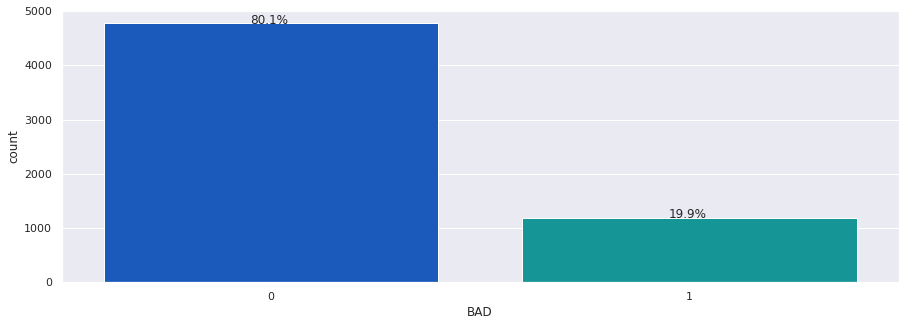

In [233]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["BAD"],palette='winter')
perc_on_bar(ax,data["BAD"])

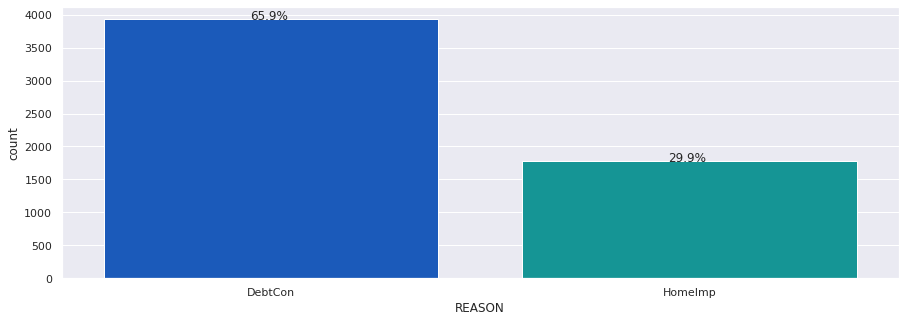

In [234]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["REASON"],palette='winter')
perc_on_bar(ax,data["REASON"])

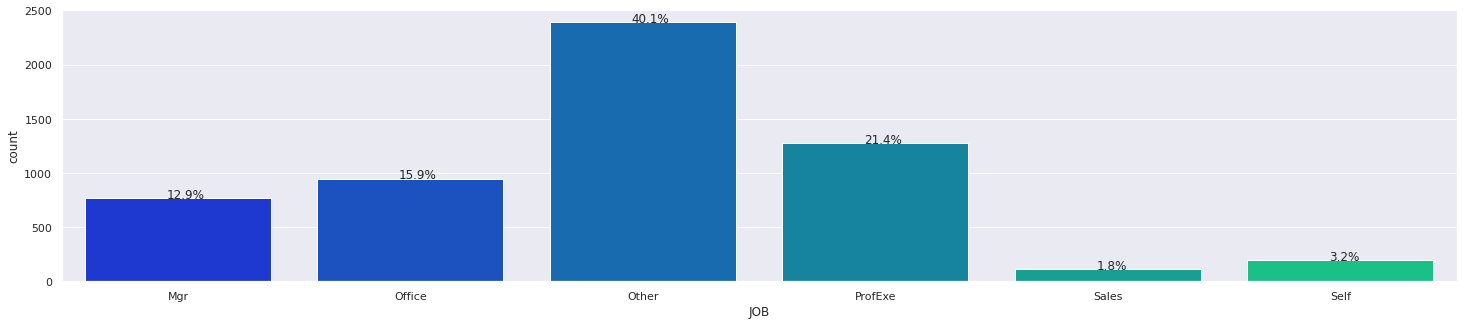

In [235]:
plt.figure(figsize=(25,5))
ax = sns.countplot(data["JOB"],palette='winter')
perc_on_bar(ax,data["JOB"])

**Insights _____________**
- 80.1% has repaid their loan and 19.9% hasn't paid, and we need to dig into the unpaid clients previous history, balance, transaction history and more demographic info to assess and conclude the features of those who tend not o repay and set the limits for them.
- 65.9% of clients tend to get the loan to pay of liabilities and consumer debts.
- Majority of the clients fill in their job as others, and the second largest fraction of  the clients are from ProfExe, third one is Office.

## **Bivariate Analysis**

###**Bivariate Analysis: Continuous and Categorical Variables**

#### Analyze BAD vs Loan

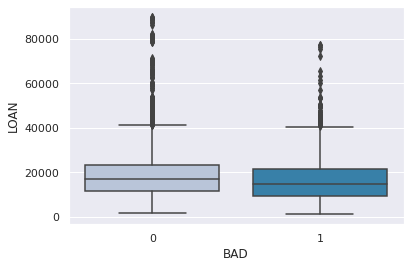

In [236]:
sns.boxplot(data["BAD"],data['LOAN'],palette="PuBu")

**Insights ______**
- Client default and loan repaid two categories both have outliers.
- The majority of both dispersion stay below or close to 20,000.
- For those who paid the loan, the amount of loan approved would be higher.

####**Note:** As shown above, perform Bi-Variate Analysis on different pair of Categorical and continuous variables

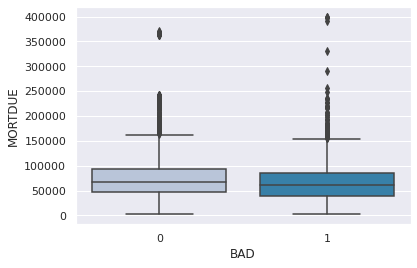

In [237]:
sns.boxplot(data["BAD"],data['MORTDUE'],palette="PuBu")

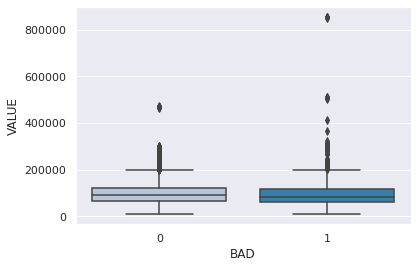

In [238]:
sns.boxplot(data["BAD"],data['VALUE'],palette="PuBu")

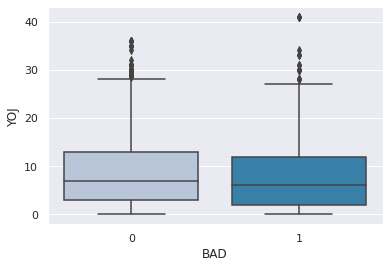

In [239]:
sns.boxplot(data["BAD"],data['YOJ'],palette="PuBu")

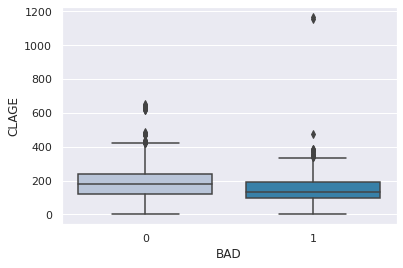

In [240]:
sns.boxplot(data["BAD"],data['CLAGE'],palette="PuBu")

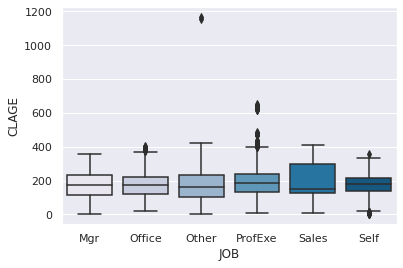

In [241]:
sns.boxplot(data["JOB"],data['CLAGE'],palette="PuBu")

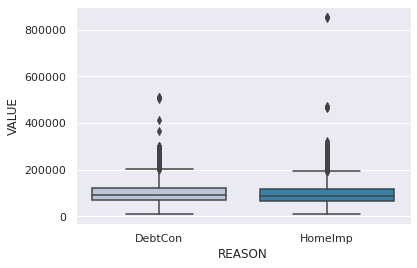

In [242]:
sns.boxplot(data["REASON"],data['VALUE'],palette="PuBu")

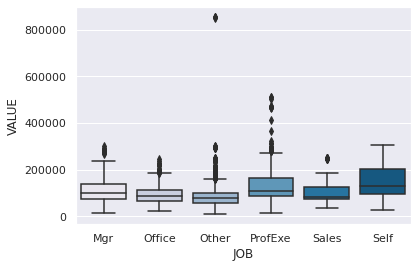

In [243]:
sns.boxplot(data["JOB"],data['VALUE'],palette="PuBu")

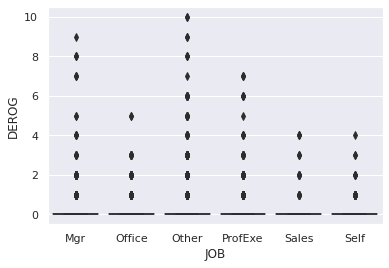

In [244]:
sns.boxplot(data["JOB"],data['DEROG'],palette="PuBu")

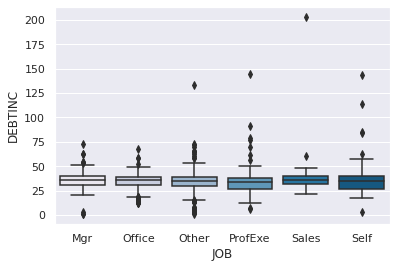

In [245]:
sns.boxplot(data["JOB"],data['DEBTINC'],palette="PuBu")

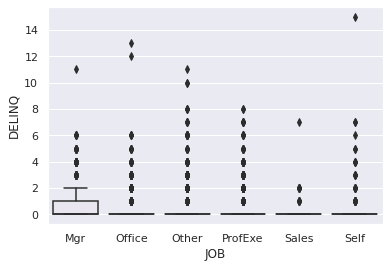

In [246]:
sns.boxplot(data["JOB"],data['DELINQ'],palette="PuBu")

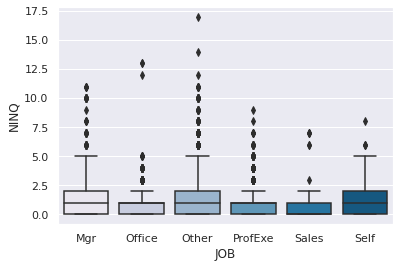

In [247]:
sns.boxplot(data["JOB"],data['NINQ'],palette="PuBu")

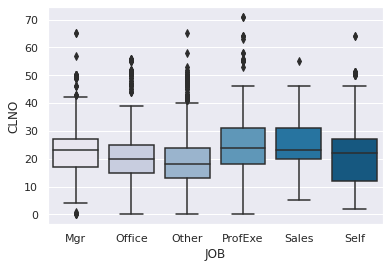

In [248]:
sns.boxplot(data["JOB"],data['CLNO'],palette="PuBu")

**Insights from Bi-variate analysis:**
- From the average Mortgage Due perspective, the difference between the amount due for defaulted or non-defaulted clients isn't large.
- **The current property value of those defaulted or non-defaulted clients are similar, whereas the defaulted client's category has higher value outliers.** The average level of current property from the defaulted clients is slightly higher. Hence the defaulted clients has the property to leverage for the loan.
- **The mean of working age of who paid their loan are longer than the defaulted.** Therefore, those who's working year are longer tend to pay off their loan.
- **For the clients who paid the loan their age of oldest credit line is longer hence they have a better credit score overall.**
- **Those who work as“ProfExe”has a higher value of property and more high value outliers, and they have a longer history of oldest credit line. Moreover, their debt-income ratio is lower among all, hence their credibility and capability to pay off the debt would be better than the rest. Besides, they have most number of existing credit lines, which is logical and fair based on their credibility performance.**
- For those who work as manager and "other" category, they tend to have more numbers of serious delinquency or late payments. They also have more recent credit request, **need to flag those types of clients, control the approval of their request and monitor their payment history.**
- For sales, they have the lowest amount of outliers of numbers of delinquent credit lines, which is a good sign of credit scoring.


### **Bivariate Analysis: Two Continuous Variables**

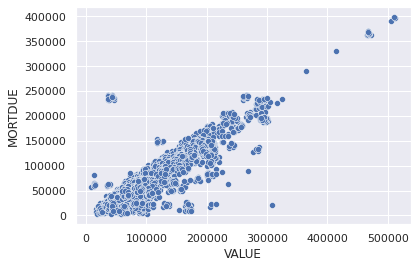

In [249]:
sns.scatterplot(data["VALUE"],data['MORTDUE'],palette="PuBu")

**Insights: _____**
- VALUE and MORTDUE has a positive linear relationship. The higher the amount of exisiting amount of mortage due, the higher value of their current property.

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of continuous variables

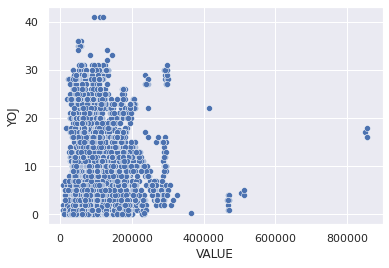

In [250]:
sns.scatterplot(data["VALUE"],data['YOJ'],palette="PuBu")

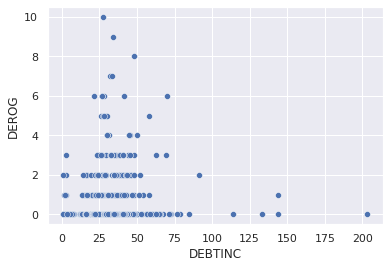

In [251]:
sns.scatterplot(data["DEBTINC"],data['DEROG'],palette="PuBu")

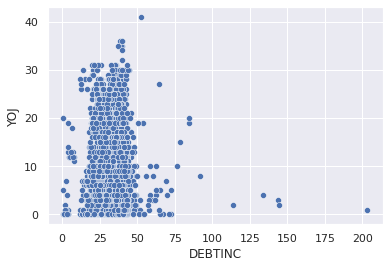

In [252]:
sns.scatterplot(data["DEBTINC"],data['YOJ'],palette="PuBu")

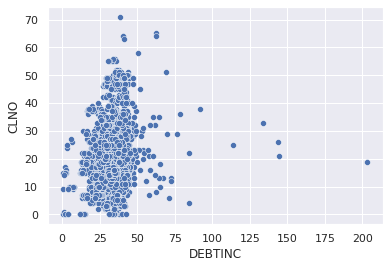

In [253]:
sns.scatterplot(data["DEBTINC"],data['CLNO'],palette="PuBu")

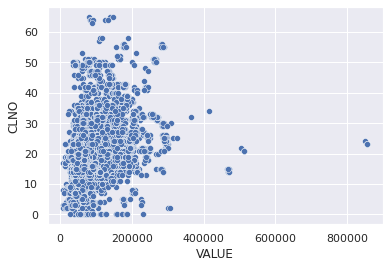

In [254]:
sns.scatterplot(data["VALUE"],data['CLNO'],palette="PuBu")

**Insights ____________**
- Negative correlation betweem DEBTINC and DEROG. The higher the debt-income ratio is, the less chance for them to have serious delinquency or late payment.
- For the rest of relations, it's not obvious to see through this type of analysis.

### **Bivariate Analysis:  BAD vs Categorical Variables**

**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.

In [255]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Plot stacked bar plot for for LOAN and REASON

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


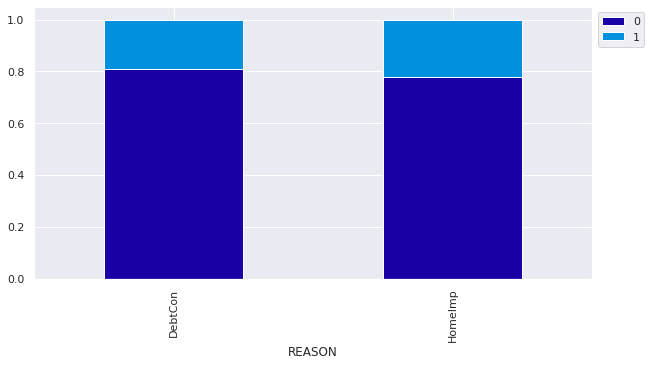

In [256]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])

**Insights ____________**
- For both debt continued and home improvement categories, the ratio between default clients and loan-repaid are similar.

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of Categorical vs BAD

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


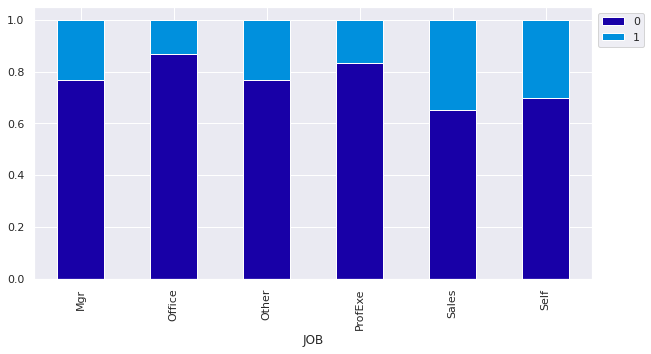

In [257]:
stacked_plot(data['JOB'])

**Insights ___________________**
- In the sales category, most of them tend to be the default clients, hence need to flag this position as risk.
- Office has the lowest default rate, so office has a better credit score. 
- Likewise, ProfExe also has a better ability to pay off the loan. 

### **Multivariate Analysis**

#### Analyze Correlation Heatmap for Numerical Variables

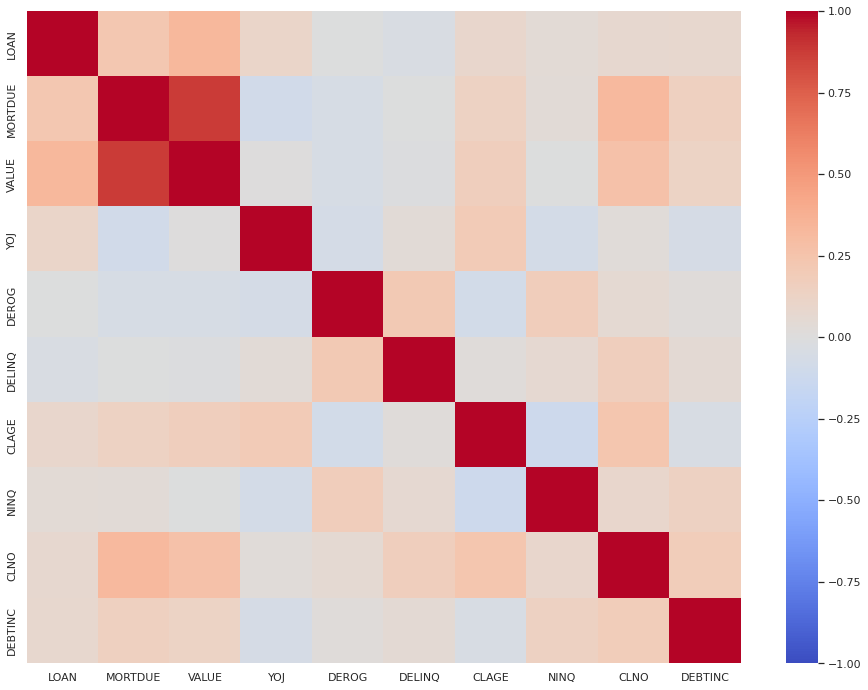

In [258]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns
# Remove ___________ and complete the code

corr = data[numerical_col].corr()

# plot the heatmap
# Remove ___________ and complete the code

plt.figure(figsize=(16,12))
sns.heatmap(corr,cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);

In [259]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


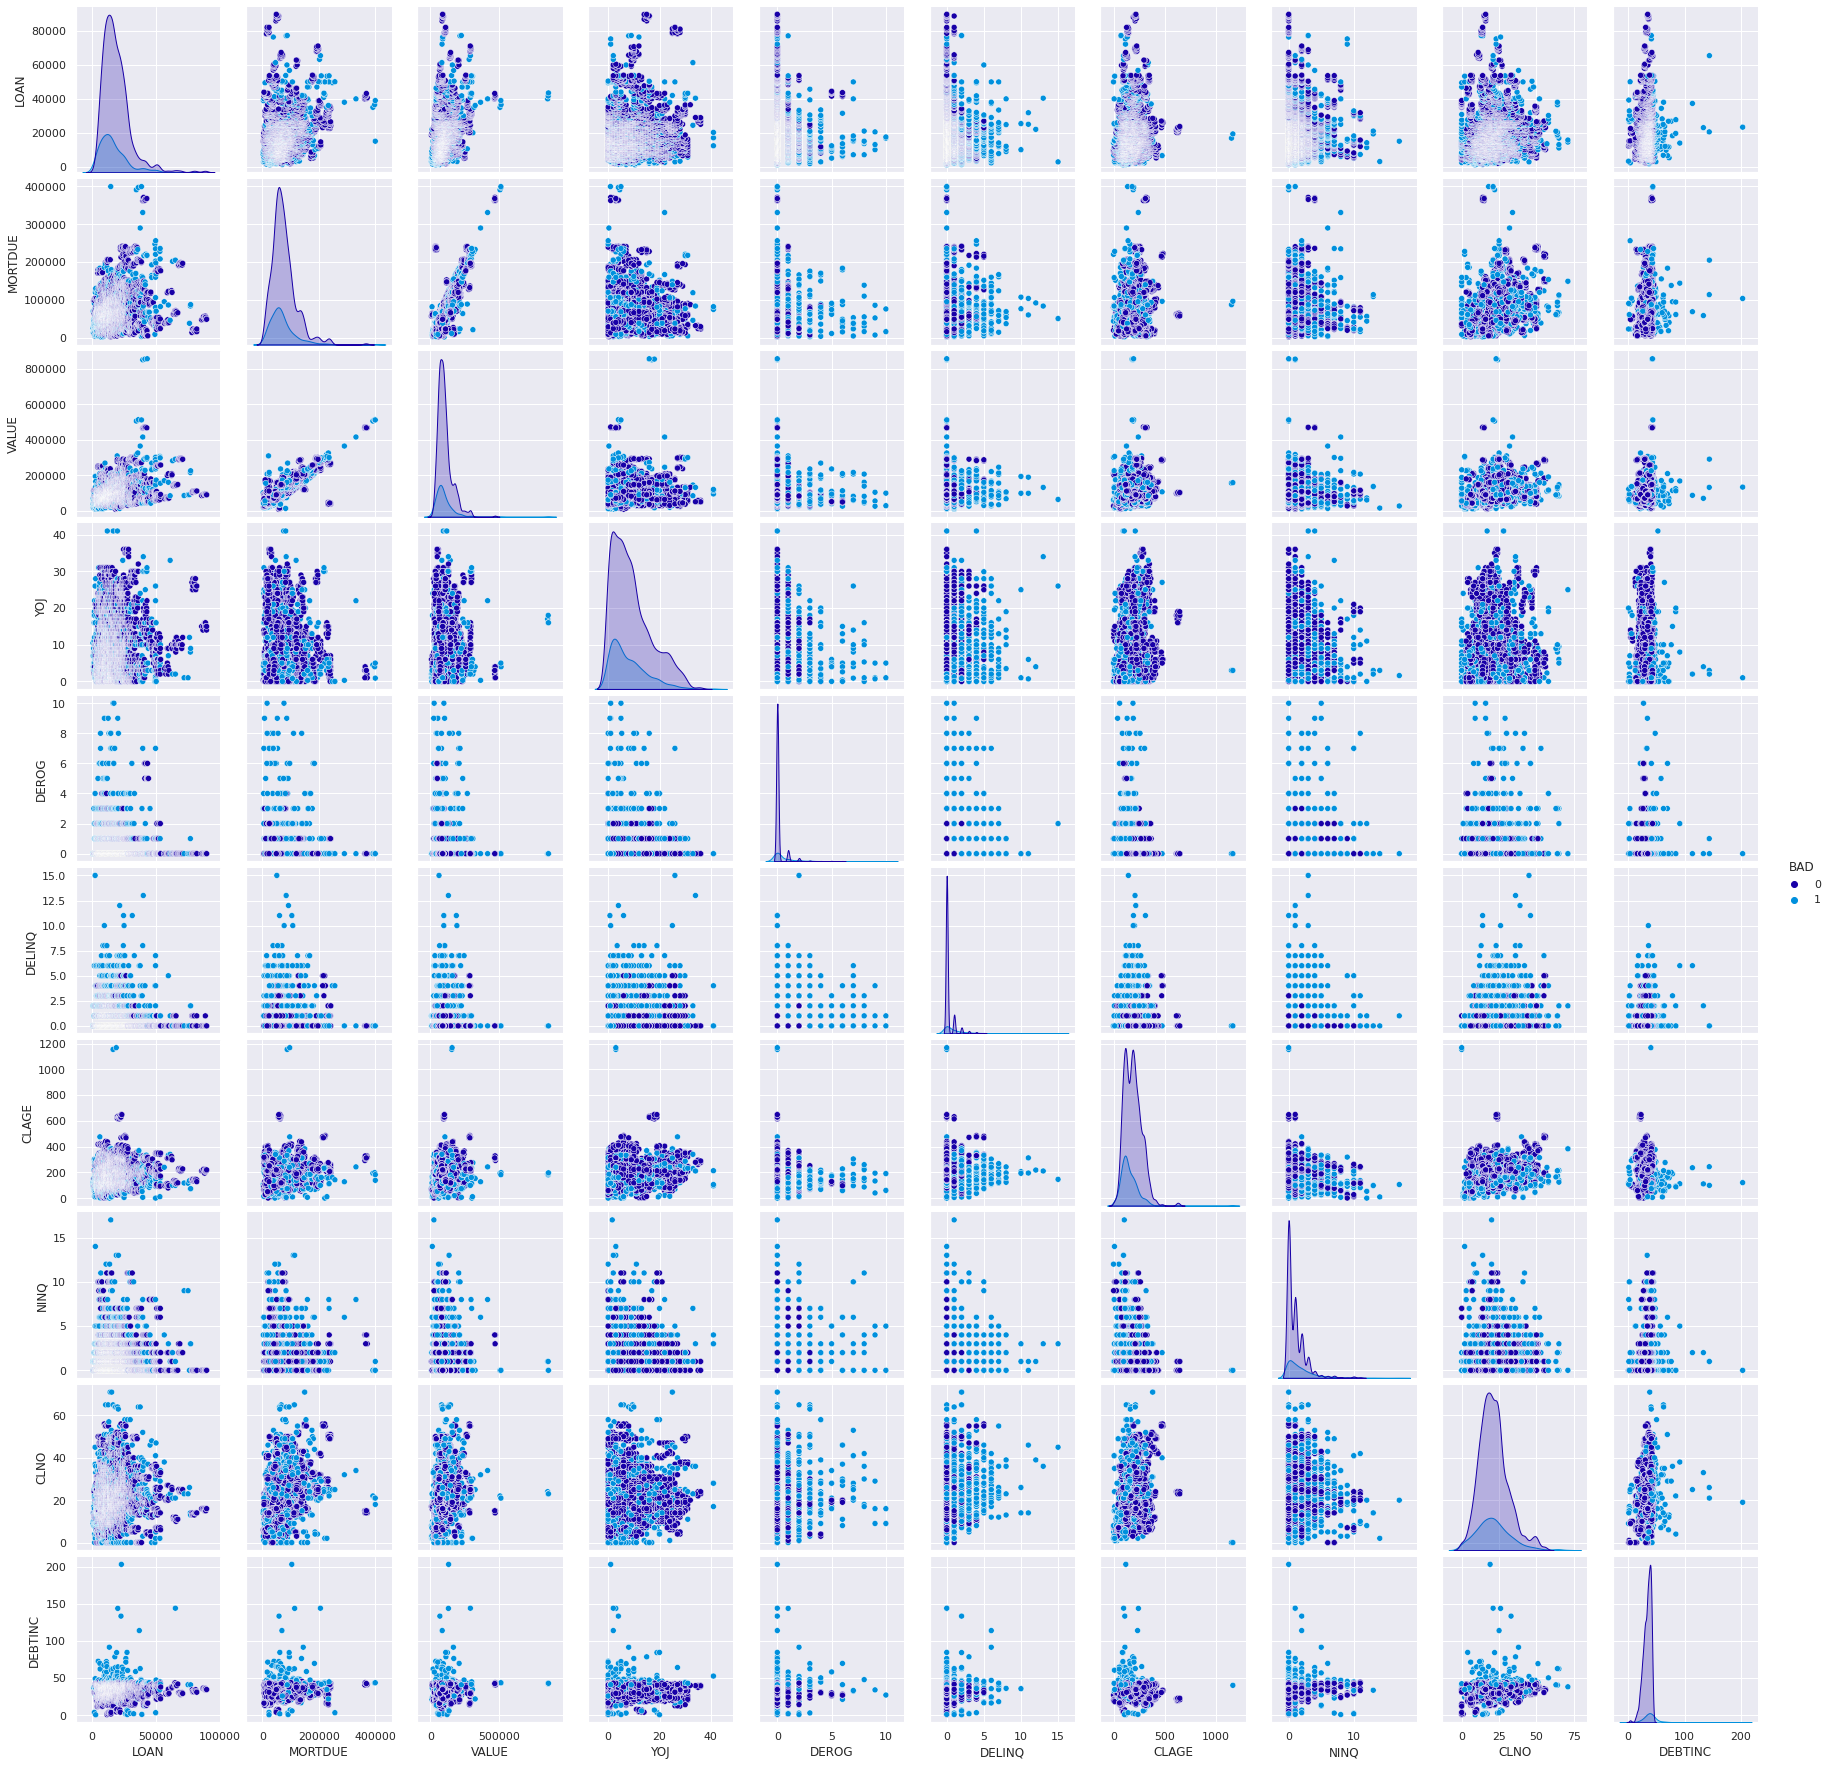

In [260]:
# Build pairplot for the data with hue = 'BAD'
# Remove ___________ and complete the code
sns.pairplot(data, hue="BAD")

### **Think about it**
- Are there missing values and outliers in the dataset? If yes, how can you treat them? 
- Can you think of different ways in which this can be done and when to treat these outliers or not?
- Can we create new features based on Missing values?

#### Treating Outliers

In [261]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    
    Q1=df.quantile(0.25) # 25th quantile
    Q3=df.quantile(0.75) # 75th quantile
    IQR=Q3-Q1   # IQR Range
    Lower_Whisker = Q1-IQR*1.5  #define lower whisker
    Upper_Whisker = Q3+IQR*1.5  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [262]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

df = treat_outliers_all(df_raw,numerical_col)

#### Adding new columns in the dataset for each column which has missing values 

In [263]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [264]:
# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)
    

#### Filling missing values in numerical columns with median and mode in categorical variables

In [265]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = data.select_dtypes('number')

# Select string and object columns.
cat_data = data.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
# Remove _________ and complete the code
data[num_data.columns] = num_data.fillna(num_data.median())

# Fill object columns with model.
# Remove _________ and complete the code
for column in cat_data:
    mode = data[column].mode()[0]
    data[column] = data[column].fillna(mode)

## **Proposed approach**
**1. Potential techniques** - What different techniques should be explored?
- For missing values in categorical data: delete the observations,fill in the most frequently appeared oe use one hot encoder. Also can use logistic regression prediction model to predict the missing values.
- For missing numerical values, can use most frequently appeared values, KNNImputer

**2. Overall solution design** - What is the potential solution design?
- Build up a model to predict who will default and who will not in future.
- Split the data into training and test data sets, fill in the blank with dummies.
-  Classification modelling
  - Predicting a customer will defulat but in reality, the customer does not default.
  - Predicting a customer will not default but in reality, the customer default.
  - Fit logistic regression model on training dataset.
  - Precision-Recall Curve for Logistic Regression.
  - Compare the performance of the model on the training set after changing the threshold and check the performance on the testing set.
  -K-NN is a distance-based algorithm and all distance-based algorithms are affected by the scale of the data.
We will scale the attributes (DataFrame X defined above) before building the K-NN model.
Then, we need to identify the value of K to be used in K-NN. We will use GridSearchCV to find the optimal value of K along with other hyperparameters.
- Fit the KNN model on the scaled training data using the optimal values of hyperparameters obtained from GridSearchCV



**3. Measures of success** - What are the key measures of success?
-  Maximize F1 Score,  greater the F1 score, higher are the chances of minimizing False Negatives and False Positives.
- Check the performance of the model on the scaled training and testing sets.

# **Milestone 2**

# **Model Building - Approach**

1. Data preparation
2. Partition the data into train and test set
3. Fit on the train data
4. Tune the model and prune the tree, if required
5. Test the model on test set

# **Data Preparation**

# **Sperating target variable with other variables**

In [266]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
# Remove _________ and complete the code
X = data.drop(columns=['BAD'])

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
# Remove _________ and complete the code
X = pd.get_dummies(X, drop_first = True)

# Create y(dependent varibale)
# Remove _________ and complete the code

y = data['BAD']

# **Splitting the data into 70% train and 30% test set**

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

# **Think about it**
- You can try different splits like 70:30 or 80:20 as per your choice. Does this change in split affect the performance?
- If the data is imbalanced, can you make the split more balanced and if yes, how?

# **Model Evaluation Criterion**
After understanding the problem statement, think about which evaluation metrics to consider and why.

# **Model can make wrong predictions as:**

- Predicting a customer will not default their but in reality, the customer default.
- Predicting a customer will default but in reality, the customer does not default.

Which case is more important?

Both the cases are important as:

- If we predict that a loan will not default and it default, then the bank will lose money and will have to bear additional interests. 

- If we predict that a loan will default and it got repaid in reality, then the hotel might not be able to provide satisfactory services to the customer by assuming that the loan will default. This might damage the brand equity.

How to reduce the losses?

Bank would want F1 Score to be maximized, greater the F1 score, higher are the chances of minimizing False Negatives and False Positives.

In [268]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# **Build a Logistic Regression Model**

In [269]:
# Defining the Logistic regression model
# Remove _________ and complete the code
log_reg=LogisticRegression(random_state=1)

# Fitting the model on the training data 
# Remove _________ and complete the code
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [270]:
pd.Series(log_reg.coef_[0], index = X_train.columns).sort_values(ascending = False)

DEBTINC           0.019399
CLNO              0.006334
DELINQ            0.006116
NINQ              0.004655
DEROG             0.003886
JOB_Self          0.000155
REASON_HomeImp    0.000111
JOB_Sales         0.000111
JOB_Other         0.000040
VALUE             0.000001
MORTDUE          -0.000007
LOAN             -0.000027
JOB_ProfExe      -0.000206
JOB_Office       -0.000434
YOJ              -0.002991
CLAGE            -0.007872
dtype: float64

# **Observations**
- TOP3 Positive attributions include DEBTINC(Detbt-to-income ratio),CLINQ(number of exisiting credit lines),and DELINQ(Number of dilingquent credit lines).
- Top 3 Negative attributions are CLAGE(age of oldest credit line in months), YOJ (years at present job), and job category of office.

# **Conclusion**
- The higher the DEBTINC the higher chance the clients will defalut, the higher number of exisiting credit lines, the more likely clients will defalut, the more number of dilinquent credit lines, the more likely the clients will default.
- The older the credit line in months is, the healthier the account is, the longer the years at present job is the less chance for the account to default, the Office clerks have least chance to default in comparison, self-employed job type have the most chance to default, in terms of job category, sales are the second dangerous one.

✅**Write your interpretations of the odds calculated from the logistic regression model coefficients**

In [271]:
# Finding the odds
odds = np.exp(log_reg.coef_[0]) 

# Adding the odds to a dataframe and sorting the values
pd.DataFrame(odds, X_train.columns, columns = ['odds']).sort_values(by = 'odds', ascending = False) 


,odds
DEBTINC,1.019588
CLNO,1.006354
DELINQ,1.006135
NINQ,1.004666
DEROG,1.003894
JOB_Self,1.000155
REASON_HomeImp,1.000111
JOB_Sales,1.000111
JOB_Other,1.000040
VALUE,1.000001




*   The top 5 relevant features attribute to default are DEBTINC, CLNO(number of existing credit lines), DELINQ(number of delinquent credit lines), NINQ (number of recent credit inquiries), DEROG(number of major derogatory reports - serious delinquency and late payments)


# **Checking the performance on the train dataset**

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      3355
           1       0.72      0.03      0.06       817

    accuracy                           0.81      4172
   macro avg       0.77      0.51      0.48      4172
weighted avg       0.79      0.81      0.73      4172



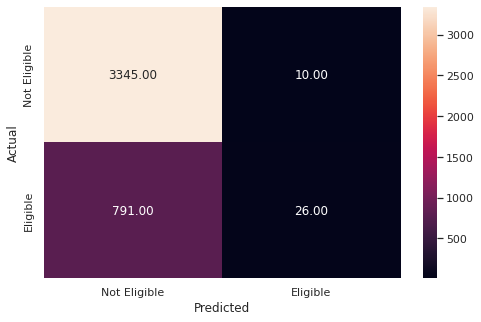

In [272]:
#Predict for train set
# Remove _________ and complete the code
lg = LogisticRegression()

lg.fit(X_train,y_train)

#checking the performance on the train dataset
# Remove _________ and complete the code
y_pred_train =lg.predict(X_train)

metrics_score(y_train, y_pred_train)

**Reading confusion matrix (clockwise):**

- True Positive: Predicting the customer will default the booking and the customer default.
- False Negative: Predicting the customer will repay the loan but the customer does not repay.
- True Negative: Predicting the customer will default and the customer pay the loan.
- False Positive: Predicting the customer will not default but the client default.


**Observations:**

- We are getting an accuracy of 81% on the training data.
- 3% recall on class 1, hence the completeness level is extremly low.
- The Precision and Recall are not balanced.
- The F1 Score for class 1 is 6%, rather low.

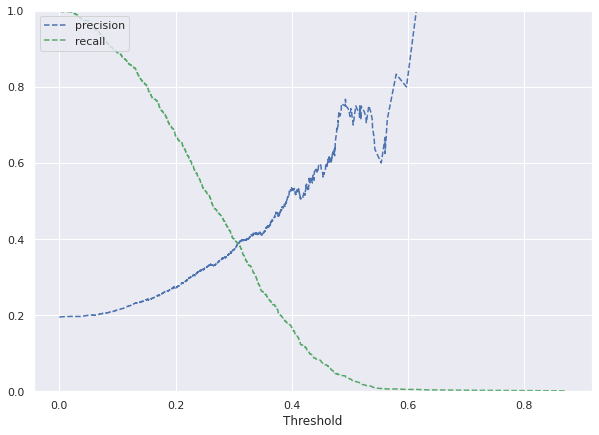

In [273]:
# predict_proba gives the probability of each observation belonging to each class

y_scores = log_reg.predict_proba(X_train) 

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores[:,1])

# Plotting values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds, precisions[:-1], 'b--', label = 'precision')

plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

**Observation**
- For a better result, we need a higher percentage of recall as well as precision. 

In [274]:
# Calculating the exact threshold where precision and recall are equal
for i in np.arange(len(thresholds)):
    if precisions[i] == recalls[i]:
        print(thresholds[i])

0.30729715879338826


- The threshold of 0.31 would give a balanced precision and recall.


# **Build a Decision Tree Model**
# **Think about it:**
In Logistic regression we treated the outliers and built the model, should we do the same for tree based models or not? If not, why?


In [275]:
# Add binary flags
# List of columns that has missing values in it
missing_col = [col for col in data.columns if data[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(data,colmn)

In [276]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = data.select_dtypes('number')

# Select string and object columns.
cat_data = data.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
# Remove _________ and complete the code
data[num_data.columns] = num_data.fillna(num_data.median())

# Fill object columns with model.
# Remove _________ and complete the code
for column in cat_data:
    mode = data[column].mode()[0]
    data[column] = data[column].fillna(mode)


**Separating the target variable y and independent variable x**

In [277]:
# Drop dependent variable from dataframe and create the X(independent variable) matrix
# Remove _________ and complete the code

X = data.drop(columns=['BAD'])

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
# Remove _________ and complete the code
X = pd.get_dummies(X, drop_first = True)

# Create y(dependent varibale)
# Remove _________ and complete the code

y = data['BAD']

**Split the Data**

In [278]:
# Split the data into training and test set
# Remove _________ and complete the code


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

In [279]:
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}
# Remove ___________ and complete the code

dt = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

In [280]:
#fitting Decision tree model
# Remove ___________ and complete the code
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

**Checking the performance on the train dataset**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



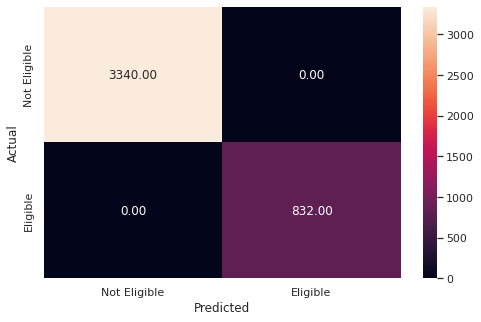

In [281]:
# Checking performance on the training data
# Remove ___________ and complete the code

y_train_pred_dt = dt.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

**Observation**
- The Decision tree is giving a 100% score for all metrics on the training dataset.

**Checking the performance on the test dataset**

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1431
           1       0.70      0.61      0.65       357

    accuracy                           0.87      1788
   macro avg       0.80      0.77      0.79      1788
weighted avg       0.87      0.87      0.87      1788



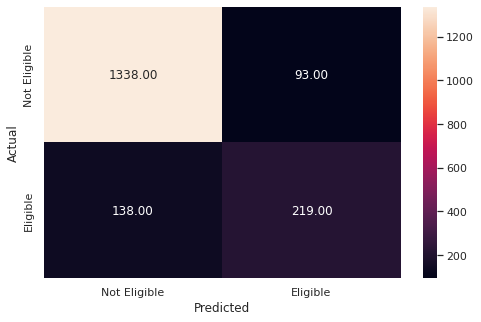

In [282]:
# Checking performance on the testing data
# Remove _________ and complete the code

# Checking performance on the test dataset
y_test_pred_dt = dt.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

**Observations:**

- The Decision Tree works well on the training data but not so well on the test data as the recall is 0.61 in comparison to 1 for the training dataset, i.e., the Decision Tree is overfitting the training data.
- The precision on the test data suggests that there's a 30% (1 - 0.70) chance that the model will predict that a person is going to default even though he/she would not, and the company may waste their reputation and treat the clients in a bad way.

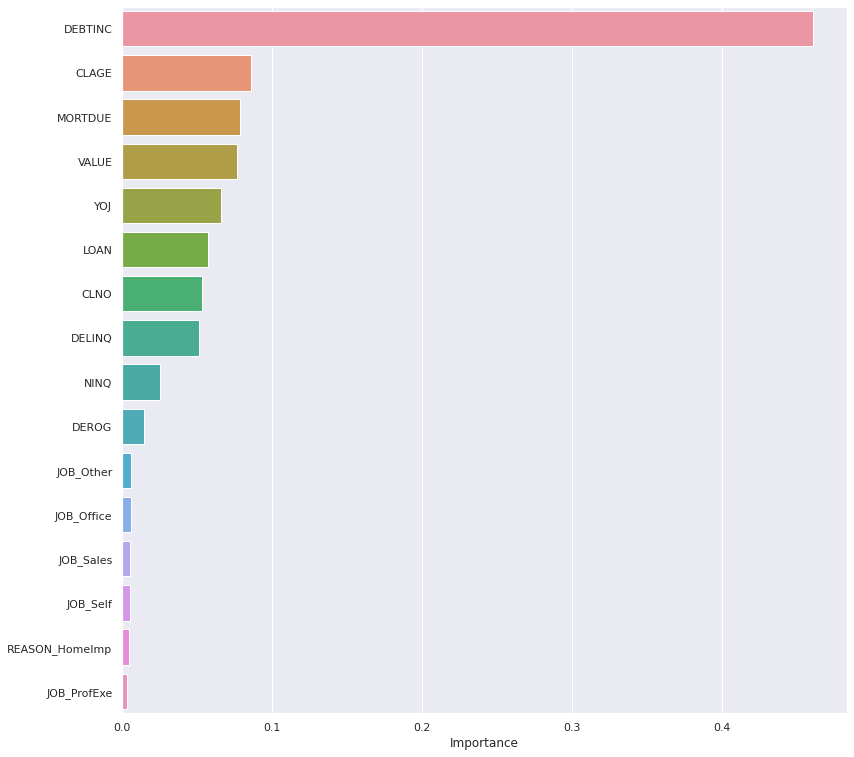

In [283]:
# Plot the feature importance

importances = dt.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance,importance_df.index)

# **Decision Tree - Hyperparameter Tuning**
- Hyperparameter tuning is tricky in the sense that there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
- Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
- It is an exhaustive search that is performed on the specific parameter values of a model.
- The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth**

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

**Using GridSearchCV for Hyperparameter tuning on the model**

In [284]:
# Choose the type of classifier. 
# Remove _________ and complete the code
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)


# Grid of parameters to choose from
# Remove _________ and complete the code
parameters = {'max_depth': np.arange(2, 7), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }


# Type of scoring used to compare parameter combinations
# Remove _________ and complete the code
scorer = metrics.make_scorer(recall_score, pos_label = 1)


# Run the grid search
# Remove _________ and complete the code
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)



# Fit the GridSearch on train dataset
# Remove _________ and complete the code
gridCV = gridCV.fit(x_train, y_train)


# Set the clf to the best combination of parameters
# Remove _________ and complete the code
dtree_estimator = gridCV.best_estimator_


# Fit the best algorithm to the data. 
# Remove _________ and complete the code
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=6,
                       min_samples_leaf=25, random_state=1)

**Checking the performance on the train dataset**

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      3340
           1       0.58      0.87      0.69       832

    accuracy                           0.85      4172
   macro avg       0.77      0.86      0.80      4172
weighted avg       0.89      0.85      0.86      4172



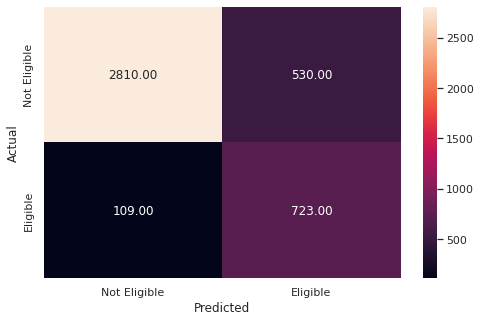

In [285]:
# Checking performance on the training data based on the tuned model
# Remove _________ and complete the code

y_train_pred_dt = dtree_estimator.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

**Observation:**

In comparison to the model with default values of hyperparameters, the performance on the training set has gone down (class 1 precision has dropped).We need to reduce the overfitting.

              precision    recall  f1-score   support

           0       0.94      0.83      0.89      1431
           1       0.55      0.80      0.65       357

    accuracy                           0.83      1788
   macro avg       0.74      0.82      0.77      1788
weighted avg       0.86      0.83      0.84      1788



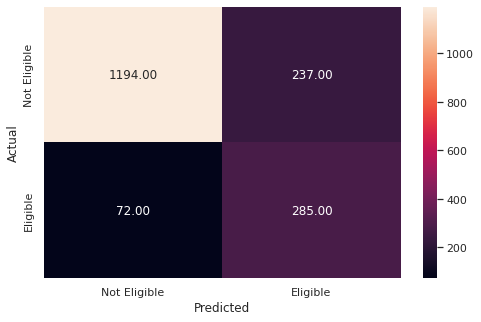

In [286]:
# Checking performance on the test dataset
y_test_pred_dt = dtree_estimator.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

**Observations:**

- The tuned model is not performing well in comparison to the model with default values of hyperparameters.
- This model is not overfitting the training data and giving approximately the same result on the test and train datasets.
- Precision has gone down significantly from .70 to .58 in comparison to the previous model which means the tuned model will give a high number of false positives, i.e., this model will predict the employee is going to default even if they won't, and this will waste company's cost.

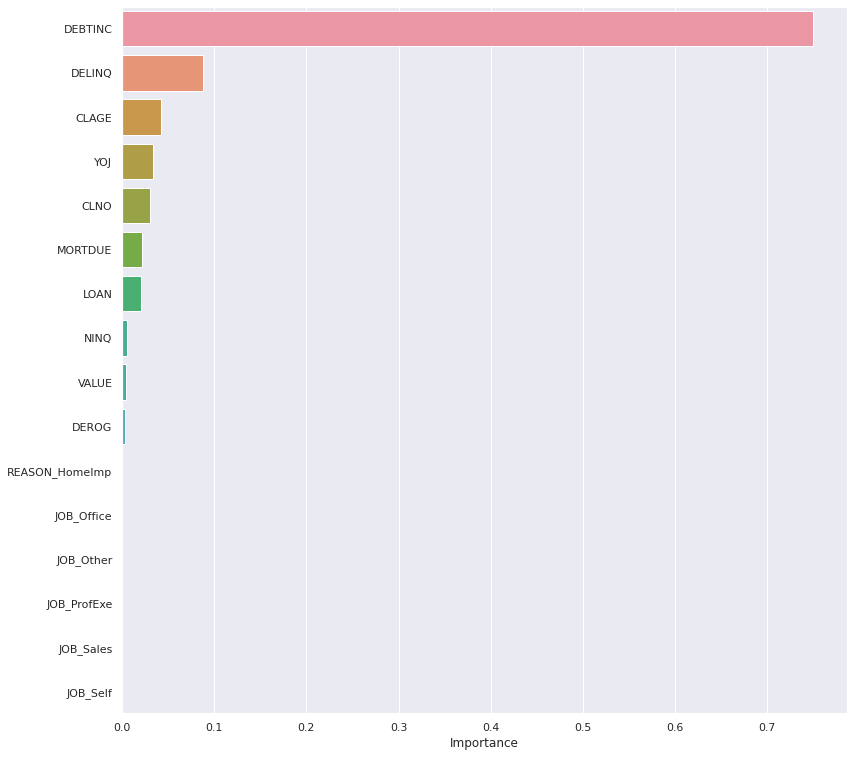

In [287]:
importances = dtree_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

**Observations:**

After tuning the model we are getting that only 1 feature is the most important one. It seems like the model is having bias, as it has simplified the problem and is not capturing the patterns associated with other variables.

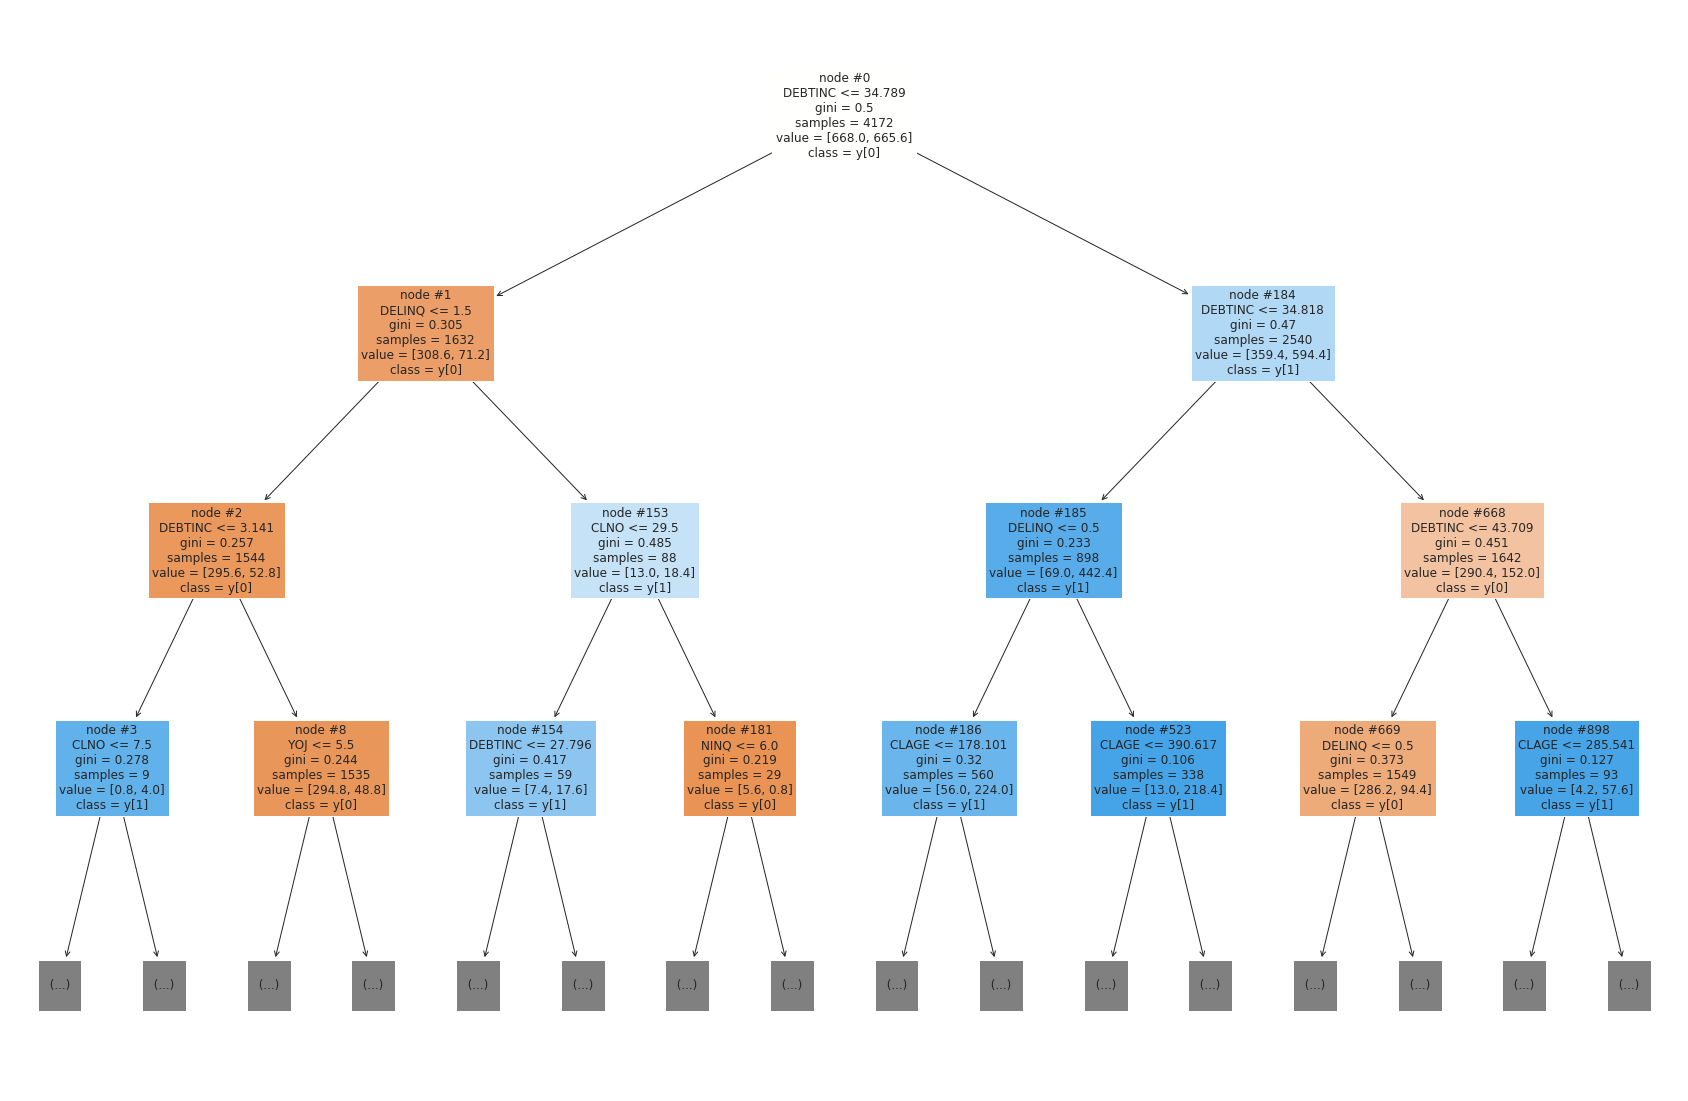

In [288]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt, max_depth = 3, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

**Deduce the business rules apparent from the Decision Tree and write them down:** 


*   The clients whose age of oldest credit line in months is less than 390.6 and their Debt-to-income ratio is between 34.79 and 34.81, with number of delinquent credit lines less than 0.5, are most likely to default. Hence the longer the credit line is the more chances to default as they are late for payment, which is not a healthy sign for credit clients. And bank need to take actions to remind or set a proper credit scoring system to control and penalize them.

*   Those whose years of present job is less than 5.5 years and their Debt-to-income ratio is less than 34.79 with number of delinquent credit lines less than 1.5 will repay their loan. The delinguent credit line is minor with medium level of working age would have adequate salary to spend, hence those clients would be more likely to pay the loan.

* Those whose delinquent credit lines number is less than 0.5 and the debt-to-income ratio is between 34.8 and 43.7 will not default, because their cabability to repay is sufficient with the less reports of deliquent lines. 



# **Building a Random Forest Classifier**
- Random Forest is a bagging algorithm where the base models are Decision Trees. Samples are taken from the training data and on each sample a decision tree makes a prediction.

- The results from all the decision trees are combined together and the final prediction is made using voting or averaging.

In [289]:
# Defining Random forest CLassifier
# Remove _________ and complete the code

rf_estimator = RandomForestClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

**Checking the performance on the train dataset**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



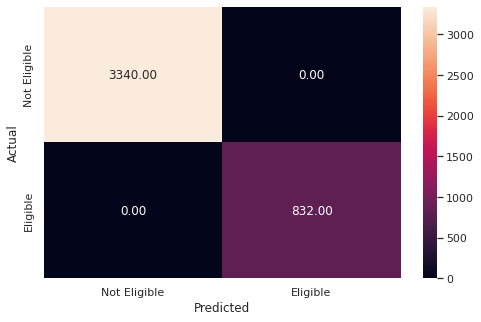

In [290]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

**Observation:**

The Random Forest is giving a 100% score for all metrics on the training dataset.

**Checking performance on the testing data**

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1431
           1       0.84      0.60      0.70       357

    accuracy                           0.90      1788
   macro avg       0.87      0.79      0.82      1788
weighted avg       0.89      0.90      0.89      1788



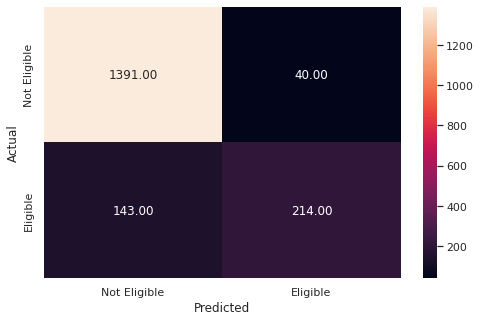

In [291]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

**Observations:**

- The Random Forest classifier seems to be overfitting the training data. The recall on the training data is 1, while the recall on the test data is only ~ 0.60 for class 1.
- Precision is high for the test data as well.

**Checking the performance on the test dataset**

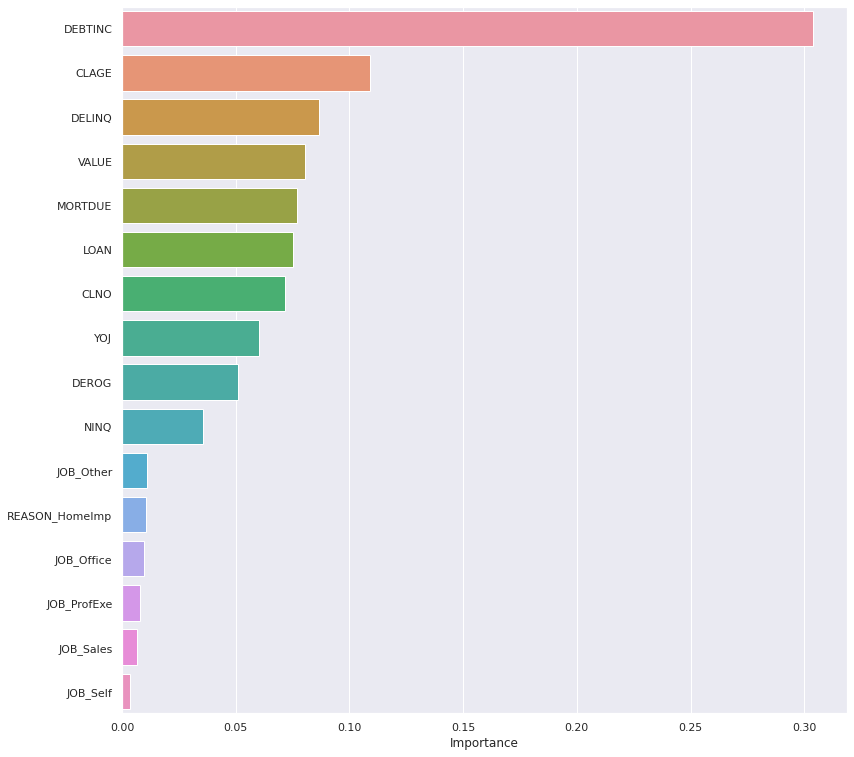

In [292]:
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

**Observations:**
- The Random Forest further verifies the results from the decision tree that the most important features are DEBTINC, CLAGE and DELINQ.
- We can say that the people appear to default because of the poor capability (insufficient salary)to repay their loan, the oldest credit line in months (impying poor ability to pay as early as possible) and too many number of delinquent credit lines. 
- Current value of their property and amount due on the existing mortgage are key features, probably as clients would need to cover their mortgage other than other expenses they request for loan. 
- Amount of loan and the number of existing credit lines also matter, possibly these added up would increase their monthly expense and reduce their payment capability. 
- Other features like,years at current job and number of major derogatory reports also seem to be intuitive in explaining attrition likelihood, as people who have less years in the job with more derogatory reports probably have lower income but higher expense hence they would default. 

- Other features such as number of recent credit inquiries and job types also play a crucial role in knowing whether a client will default or not.

**Tuning the Random Forest**
- Hyperparameter tuning is tricky in the sense that there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.

- Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.

- It is an exhaustive search that is performed on the specific parameter values of a model.

- The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.
**n_estimators: The number of trees in the forest.**

**min_samples_split:** The minimum number of samples required to split an internal node:

**min_samples_leaf:** The minimum number of samples required to be at a leaf node.

**max_features{“auto”, “sqrt”, “log2”, 'None'}:** The number of features to consider when looking for the best split.

If “**auto**”, then **max_features=sqrt(n_features)**.

If “**sqrt**”, then **max_features=sqrt(n_features) (same as “auto”)**.

If “**log2**”, then **max_features=log2(n_features)**.

If **None**, then **max_features=n_features**.

You can learn more about Random Forest Hyperparameters from the link given below and try to tune them

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [293]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}

# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

# Grid of parameters to choose from
params_rf = {  
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

**Checking the performance on the train dataset**

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3340
           1       0.92      0.99      0.96       832

    accuracy                           0.98      4172
   macro avg       0.96      0.98      0.97      4172
weighted avg       0.98      0.98      0.98      4172



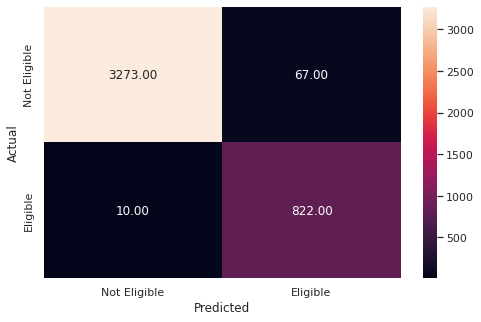

In [294]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)

metrics_score(y_train, y_pred_train_rf_tuned)

**Checking the performance on the test dataset**

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1431
           1       0.80      0.71      0.76       357

    accuracy                           0.91      1788
   macro avg       0.87      0.84      0.85      1788
weighted avg       0.90      0.91      0.91      1788



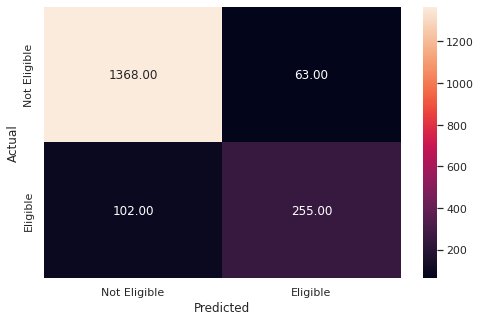

In [295]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)

metrics_score(y_test, y_pred_test_rf_tuned)

**Observations:**

- The tuned model is also slightly overfitting the training dataset, but it shows a good performance on the test dataset.

- The recall for class 1 has improved with a small decrease in precision.
This model is the best-performing one among all the models so far, and is giving us good precision and recall scores on the test dataset.

**Plot the Feature importance of the tuned Random Forest**

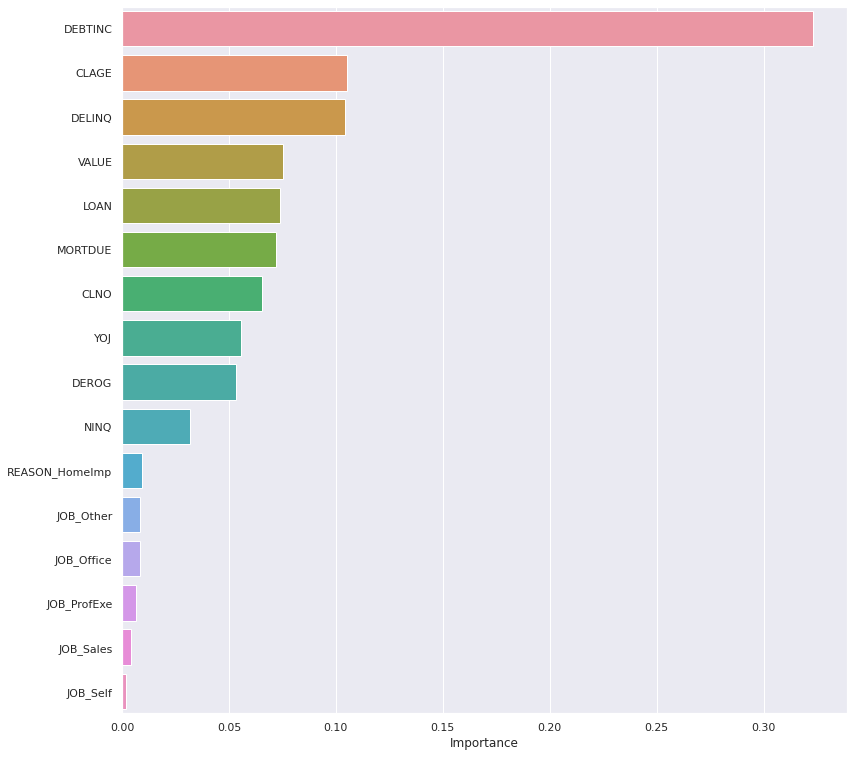

In [296]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset
# Remove _________ and complete the code

# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

**Observations:**

- The feature importance plot for the base model and tuned model are quite similar. The model seems to suggest that DEBTINC, CLAGE, DELINQ, VALUE, LOAN and MORTDUE are the most important features.
- Other important features are CLNO, YOJ, DEROG and NINQ.

**Think about it:**
- We have only built 3 models so far, Logistic Regression, Decision Tree and Random Forest
- We can build other Machine Learning classification models like kNN, LDA, QDA or even Support Vector Machines (SVM).
- Can we also perform feature engineering and create model features and build a more robust and accurate model for this problem statement?

# **Neuro Network Model**

In [297]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
# Remove _________ and complete the code
X = data.drop(columns=['BAD'])

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
# Remove _________ and complete the code
features = pd.get_dummies(X, drop_first = True)

# Create y(dependent varibale)
# Remove _________ and complete the code

target = data['BAD']

In [298]:
features.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262,1,0,1,0,0,0
1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262,1,0,1,0,0,0
2,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262,1,0,1,0,0,0
3,1500,65019.0,89235.5,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262,0,0,1,0,0,0
4,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262,1,1,0,0,0,0


The size of the dataset is small and the Keras implementation provides an argument for selecting some percentage of training data as validation data to check the accuracy of the model. Therefore, we will split the data into an 80:20 ratio.

In [299]:
# Splitting the dataset into the train and the test data
X_train, X_test, y_train, y_test =  train_test_split(features, target, test_size = 0.2, random_state = 42)

Now, we will perform scaling on the numerical variables separately for train and test sets. We will perform fit and transform on the train data and then we will only perform transform on the test data.

In [300]:
scaler = MinMaxScaler()

# Here, we are passing all the features (numerical and categorical), that's okay as min-max scaler will not change values of categorical variables
X_train_normalized = scaler.fit_transform(X_train)

In [301]:
X_test_normalized = scaler.transform(X_test)

In [302]:
# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [307]:
# We will be adding the layers sequentially
model_1 = Sequential()

# First hidden layer with 128 neurons and relu activation function, the input_shape tuple denotes number of independent variables
model_1.add(Dense(128, activation = 'relu', input_shape = (16, )))

# We will be switching 20% of neurons randomly at each iteration to avoid overfitting
model_1.add(Dropout(0.2))

# Second hidden layer with 64 neurons and relu activation function
model_1.add(Dense(64, activation = 'relu'))

# We will be switching 10% of neurons off randomly at each iteration to avoid 
model_1.add(Dropout(0.1))

# Output layer with only one neuron and sigmoid as activation function which will give the probability of DEFAULT 
model_1.add(Dense(1, activation = 'sigmoid'))

Once we are done with the model architecture, we need to compile the model, where we need to provide the loss function that we want to optimize, the optimization algorithm, and the evaluation metric that we are interested in to evaluate the model.

Since this is a binary classification task, we will be minimizing the binary_crossentropy and we can choose one optimizer out of

- SGD
- RMSprop
- Adam
- Adadelta
- Adagrad
- Adamax
- Nadam
- Ftrl


This is a hyper-parameter. You can play around with these optimizers to check which one performs better with a particular data.

For now, let's try adamax optimizer with accuracy as the metric and see the model's summary.

In [309]:
model_1.compile(loss = 'binary_crossentropy', optimizer = 'adamax', metrics = ['accuracy'])

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               2176      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,497
Trainable params: 10,497
Non-trainable params: 0
_________________________________________________________________


**Training the model**

Let's now train the model using the below piece of code. We will keep 10% of the training data for validation.

In [310]:
history_1 = model_1.fit(X_train_normalized, 
                        
                    y_train,

                    validation_split = 0.1, 

                    epochs = 150, 

                    verbose = 2)

Epoch 1/150
135/135 - 2s - loss: 0.5310 - accuracy: 0.7739 - val_loss: 0.4398 - val_accuracy: 0.8302 - 2s/epoch - 15ms/step
Epoch 2/150
135/135 - 0s - loss: 0.4696 - accuracy: 0.8035 - val_loss: 0.4250 - val_accuracy: 0.8302 - 300ms/epoch - 2ms/step
Epoch 3/150
135/135 - 0s - loss: 0.4533 - accuracy: 0.8052 - val_loss: 0.4118 - val_accuracy: 0.8323 - 257ms/epoch - 2ms/step
Epoch 4/150
135/135 - 0s - loss: 0.4363 - accuracy: 0.8140 - val_loss: 0.4035 - val_accuracy: 0.8428 - 402ms/epoch - 3ms/step
Epoch 5/150
135/135 - 1s - loss: 0.4238 - accuracy: 0.8257 - val_loss: 0.3934 - val_accuracy: 0.8407 - 510ms/epoch - 4ms/step
Epoch 6/150
135/135 - 1s - loss: 0.4092 - accuracy: 0.8338 - val_loss: 0.3877 - val_accuracy: 0.8407 - 658ms/epoch - 5ms/step
Epoch 7/150
135/135 - 1s - loss: 0.4051 - accuracy: 0.8352 - val_loss: 0.3848 - val_accuracy: 0.8428 - 635ms/epoch - 5ms/step
Epoch 8/150
135/135 - 1s - loss: 0.4001 - accuracy: 0.8394 - val_loss: 0.3870 - val_accuracy: 0.8491 - 710ms/epoch - 5ms

**Plotting Accuracy vs Epoch**


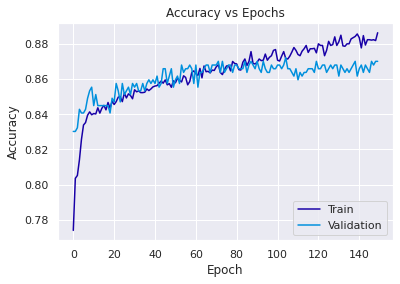

In [311]:
plt.plot(history_1.history['accuracy'])

plt.plot(history_1.history['val_accuracy'])

plt.title('Accuracy vs Epochs')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'lower right')

plt.show()

**Observations:**

- The training accuracy is fluctuating but overall it is increasing with the increase in the epochs.
- The validation accuracy is constant between 120 to 140 epochs.
- The model is giving good accuracy. After 120 epochs, the accuracy of the model on the training data is about 88% and the validation accuracy is 86%.
- The validation accuracy is closer to the training accuracy. This indicates that the model is giving a generalized performance.

Let's try to increase the model complexity by tuning some of the hyper-parameters mentioned earlier and check if we can improve the model performance. Out of all the options we have, let's try to change the number of hidden layers, the number of neurons in each hidden layer, the activation function in the hidden layer, and the optimizer from adamax to adam. Also, we have observed that validation accuracy became constant after some epochs, let's try less number of epochs which would also reduce the computation time.

First, we need to clear the previous model's history from the session. In Keras, we need special command to clear the model's history otherwise the previous model history remains in the backend. Also, let's fix the seed again after clearing the backend.

In [312]:
# Clearing the backend
from tensorflow.keras import backend

backend.clear_session()

In [313]:
# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [318]:
model_2 = Sequential()

model_2.add(Dense(128, activation = 'tanh', input_shape = (16, )))

model_2.add(Dropout(0.1))

model_2.add(Dense(64, activation = 'tanh'))

model_2.add(Dropout(0.1))

model_2.add(Dense(32, activation = 'tanh'))

model_2.add(Dense(1, activation = 'sigmoid'))

In [320]:
model_2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               2176      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,545
Trainable params: 12,545
Non-trai

In [321]:
history_2 = model_2.fit(X_train_normalized,
                         
                    y_train, 

                    validation_split = 0.1,

                    epochs = 100,

                    verbose = 2)

Epoch 1/100
135/135 - 1s - loss: 0.4462 - accuracy: 0.8196 - val_loss: 0.3996 - val_accuracy: 0.8323 - 1s/epoch - 9ms/step
Epoch 2/100
135/135 - 0s - loss: 0.4020 - accuracy: 0.8352 - val_loss: 0.3842 - val_accuracy: 0.8365 - 376ms/epoch - 3ms/step
Epoch 3/100
135/135 - 0s - loss: 0.3911 - accuracy: 0.8373 - val_loss: 0.3832 - val_accuracy: 0.8407 - 437ms/epoch - 3ms/step
Epoch 4/100
135/135 - 0s - loss: 0.3916 - accuracy: 0.8404 - val_loss: 0.3913 - val_accuracy: 0.8449 - 394ms/epoch - 3ms/step
Epoch 5/100
135/135 - 0s - loss: 0.3968 - accuracy: 0.8380 - val_loss: 0.3742 - val_accuracy: 0.8491 - 382ms/epoch - 3ms/step
Epoch 6/100
135/135 - 0s - loss: 0.3876 - accuracy: 0.8408 - val_loss: 0.3823 - val_accuracy: 0.8428 - 426ms/epoch - 3ms/step
Epoch 7/100
135/135 - 0s - loss: 0.3888 - accuracy: 0.8397 - val_loss: 0.3781 - val_accuracy: 0.8470 - 348ms/epoch - 3ms/step
Epoch 8/100
135/135 - 0s - loss: 0.3869 - accuracy: 0.8392 - val_loss: 0.3808 - val_accuracy: 0.8428 - 367ms/epoch - 3ms/

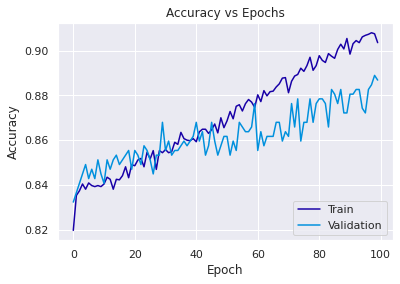

In [322]:
plt.plot(history_2.history['accuracy'])

plt.plot(history_2.history['val_accuracy'])

plt.title('Accuracy vs Epochs')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'lower right')

plt.show()

**Observations:**

- We can improve the model performance on the training data - accuracy is increased by 3%, the validation accuracy is same.

Let's try to further tune some of the hyper-parameters and check if we can improve the model performance.

We will use learning_rate = 0.001 for the optimizer in the training process and increase the model complexity by further increasing the number of layers, the number of nodes in each layer, and the epochs.

In [323]:
# Clearing the backend
from tensorflow.keras import backend

backend.clear_session()

In [324]:
# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [325]:
model_3 = Sequential()

model_3.add(Dense(256, activation = 'tanh', input_shape = (16, )))

model_3.add(Dropout(0.1))

model_3.add(Dense(128, activation = 'tanh'))

model_3.add(Dropout(0.1))

model_3.add(Dense(64, activation = 'tanh'))

model_3.add(Dropout(0.1))

model_3.add(Dense(32, activation = 'tanh'))

model_3.add(Dense(1, activation = 'sigmoid'))

In [326]:
model_3.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), metrics = ['accuracy'])

model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               4352      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

**Notice that the number of trainable parameters has increased substantially in comparison to previous models.**

In [327]:
history_3 = model_3.fit(X_train_normalized, 
                        
                    y_train,

                    validation_split = 0.1,

                    epochs = 200,

                    verbose = 2)

Epoch 1/200
135/135 - 3s - loss: 0.4441 - accuracy: 0.8213 - val_loss: 0.4028 - val_accuracy: 0.8344 - 3s/epoch - 25ms/step
Epoch 2/200
135/135 - 1s - loss: 0.4025 - accuracy: 0.8373 - val_loss: 0.3870 - val_accuracy: 0.8386 - 532ms/epoch - 4ms/step
Epoch 3/200
135/135 - 0s - loss: 0.3960 - accuracy: 0.8378 - val_loss: 0.3820 - val_accuracy: 0.8491 - 376ms/epoch - 3ms/step
Epoch 4/200
135/135 - 0s - loss: 0.3877 - accuracy: 0.8369 - val_loss: 0.3932 - val_accuracy: 0.8449 - 373ms/epoch - 3ms/step
Epoch 5/200
135/135 - 0s - loss: 0.3936 - accuracy: 0.8385 - val_loss: 0.3728 - val_accuracy: 0.8491 - 352ms/epoch - 3ms/step
Epoch 6/200
135/135 - 0s - loss: 0.3835 - accuracy: 0.8411 - val_loss: 0.3746 - val_accuracy: 0.8512 - 363ms/epoch - 3ms/step
Epoch 7/200
135/135 - 0s - loss: 0.3769 - accuracy: 0.8429 - val_loss: 0.3759 - val_accuracy: 0.8637 - 362ms/epoch - 3ms/step
Epoch 8/200
135/135 - 0s - loss: 0.3743 - accuracy: 0.8420 - val_loss: 0.3722 - val_accuracy: 0.8449 - 360ms/epoch - 3ms

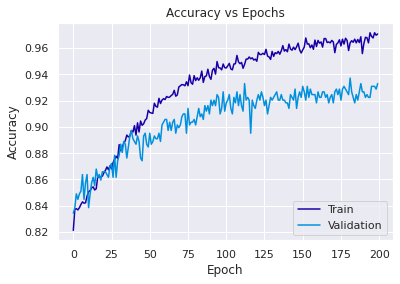

In [328]:
plt.plot(history_3.history['accuracy'])

plt.plot(history_3.history['val_accuracy'])

plt.title('Accuracy vs Epochs')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc  = 'lower right')

plt.show()

**Observation**
- This model is giving a generalized performance with 97% accuracy on the train and 93% accuracy on validation data.
- The validation accuracy increases by 4% and training accuracy increases by 6%.

Among all three models, model 3 has given the best performance. Let's check its performance on the test data.

In [329]:
model_3.evaluate(X_test_normalized, y_test, verbose = 1)

test_pred = np.round(model_3.predict(X_test_normalized))

38/38 [==============================] - 0s 2ms/step - loss: 0.2876 - accuracy: 0.9178


The test accuracy is also coming out to be 93% which implies that our model is able to replicate the performance from the train and validation data on the test (unseen) data.

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       927
           1       0.93      0.68      0.79       265

    accuracy                           0.92      1192
   macro avg       0.92      0.83      0.87      1192
weighted avg       0.92      0.92      0.91      1192



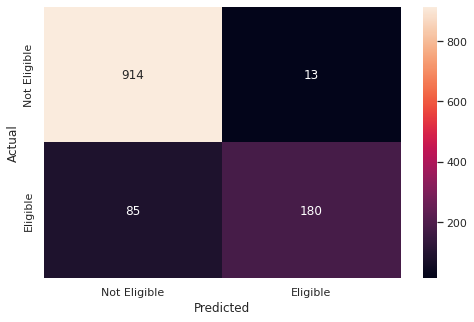

In [330]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

print(classification_report(y_test, test_pred))

cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Not Eligible', 'Eligible'], yticklabels = ['Not Eligible', 'Eligible'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset
# Remove _________ and complete the code

# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

# **Comparing Model Performances**

In [ ]:
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [ ]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [ ]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [ ]:
# Make the list of all the model names 

models = [___________________________]
# Remove _________ and complete the code

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [ ]:
# Mention the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write tht names of all model built]
# Remove _________ and complete the code

comparison_frame = pd.DataFrame({'Model':[______________________], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame